# TM10007 Assignment template

In [186]:
# Run this to use from colab environment
!git clone https://github.com/Doesjka/TM10007_ML_g9.git

fatal: destination path 'TM10007_ML_g9' already exists and is not an empty directory.


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [187]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import decomposition
import seaborn
import matplotlib.pyplot as plt

data = pd.read_csv('/content/TM10007_ML_g9/worclipo/Lipo_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 115
The number of columns: 494


## Splitting data in train and test set


In [188]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, data.index, test_size=0.25, random_state=42)
labels_train = X_train['label']
X_train = X_train.drop(columns='label')

## Handling missing data 
### Throwing out features
All features that exist of at least 50% zeros are deleted from the data. 


In [189]:
zeros = (X_train == 0).sum()
threshold = 0.5 * len(y_train)
print('Threshold = ', threshold)
feature_del = zeros[zeros > threshold]

X_train = X_train.drop(columns=feature_del.index)
print(f'{len(data.columns)-len(X_train.columns)} features were deleted')

Threshold =  43.0
24 features were deleted


In [190]:
more_zeros = (X_train == 0).sum()
columns_zeros = more_zeros[more_zeros > 0].index
print(f'Of the remaining features, {len(columns_zeros)} features have at least one zero')
print(f'There is a total of {more_zeros.sum()} zeros left in the data')


Of the remaining features, 13 features have at least one zero
There is a total of 81 zeros left in the data


## Calculate number of missing values per sample

In [191]:
zeros_r = (X_train == 0).sum(axis=1)
threshold = 0.005 * X_train.size / len(y_train)
print('Threshold = ', threshold)
feature_del = zeros_r[zeros_r > threshold]
print(feature_del)

Threshold =  2.35
ID
Lipo-069_0    3
Lipo-051_0    3
Lipo-090_0    5
Lipo-076_0    3
Lipo-003_0    3
Lipo-088_0    3
dtype: int64


In [216]:
from scipy.stats import shapiro

aantal_normaal = 0

for column in X_train.columns:
    result = shapiro(X_train[column])
    # print(result.pvalue)
    normaal = result.pvalue > 0.05
    aantal_normaal += normaal
    
print(aantal_normaal)



76


### Filling remaining zeros
All remaining zeros are replaced by the mean of that feature. 

In [217]:
X_train_mean = X_train
X_train_median = X_train

for column in columns_zeros[:]:
    print('Kolom: ', column)
    column_mean = X_train.loc[X_train[column]!=0, column].mean()
    column_median = X_train.loc[X_train[column]!=0, column].median()
    print('mean = ', column_mean)
    print('median = ', column_median)

    verschil2_percolumn = column_mean - column_median
    print('Verschil tussen mean en median = ',verschil2_percolumn)

    # result = shapiro(X_train[column])
    # result.pvalue
    print('p-waarde normaalverdeling = ', shapiro(X_train.loc[X_train[column]!=0, column]).pvalue)

    X_train_mean[column].replace(0, column_mean)
    X_train_median[column].replace(0, column_median)

    print(' ')

verschil = abs(X_train_mean - X_train_median)
print('Totaal verschil = ', verschil.sum().sum())

# X_train.head()
# pd.set_option('display.max_rows', None)
# print(X_train[columns_zeros[0]])
# pd.set_option('display.max_rows', 10)


Kolom:  PREDICT_original_sf_area_min_2.5D
mean =  537.084274435431
median =  245.599365234375
Verschil tussen mean en median =  291.484909201056
p-waarde normaalverdeling =  1.262648704125277e-13
 
Kolom:  PREDICT_original_tf_LBP_quartile_range_R8_P24
mean =  9.349397590361447
median =  12.0
Verschil tussen mean en median =  -2.6506024096385534
p-waarde normaalverdeling =  3.746887159650214e-06
 
Kolom:  PREDICT_original_tf_LBP_peak_R15_P36
mean =  36.26000000000001
median =  36.26
Verschil tussen mean en median =  1.4210854715202004e-14
p-waarde normaalverdeling =  1.0
 
Kolom:  PREDICT_original_tf_LBP_peak_position_R15_P36
mean =  49.0
median =  49.0
Verschil tussen mean en median =  0.0
p-waarde normaalverdeling =  1.0
 
Kolom:  PREDICT_original_tf_LBP_quartile_range_R15_P36
mean =  16.444444444444443
median =  19.0
Verschil tussen mean en median =  -2.555555555555557
p-waarde normaalverdeling =  0.052347369492053986
 
Kolom:  PREDICT_original_vf_Frangi_full_quartile_range_SR(1.0, 1

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


## Scaling

In [199]:
# scaler = preprocessing.StandardScaler().fit(X_train_median)
# X_train_scaled = scaler.transform(X_train_median)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_median.columns)

scaler = preprocessing.RobustScaler().fit(X_train_median)
X_train_scaled = scaler.transform(X_train_median)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_median.columns)

# scaler = preprocessing.MinMaxScaler().fit(X_train_median)
# X_train_scaled = scaler.transform(X_train_median)
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_median.columns)

## PCA

[9.96222084e-01 3.77785060e-03 5.28891404e-08 1.06125368e-08
 1.41946426e-09]


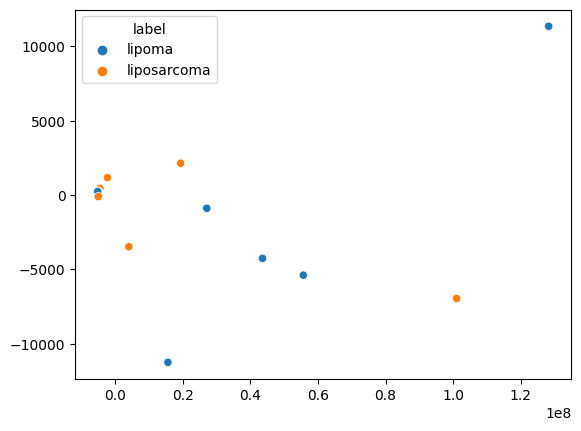

In [205]:
pca = decomposition.PCA(n_components=5)
pca.fit(X_train_scaled_df)
X_pca = pca.transform(X_train_scaled_df)
seaborn.scatterplot(x=X_pca[:, 0], y=X_pca[:, 3], hue=labels_train)
# plt.xscale('log')
# plt.yscale('log')
print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

pca_df = pd.DataFrame(pca.components_,columns=X_train_scaled_df.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
max_feature = pca_df.idxmax(axis=1)
# print(X_train_scaled_df[max_feature.iloc[1]])
# seaborn.scatterplot(x=X_train_scaled_df[max_feature.iloc[0]], y=X_train_scaled_df[max_feature.iloc[1]], hue=labels_train)
# print(max_feature)